In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
%matplotlib inline

In [3]:
def f(x,sd):
    return np.sin(x)+np.random.rand(1)*sd

In [4]:
np.random.seed(123)
# x : 0 ~ 10 
x = np.array([x*0.1 for x in range(0,100)])
y = np.array(list(map(lambda x:f(x,1), x)))

## Target Data

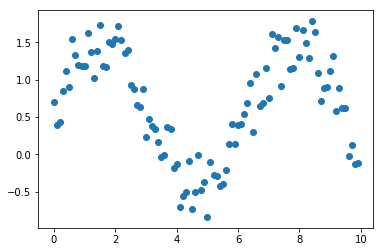

In [5]:
plt.scatter(x,y)
plt.show()

## Fit the first tree

In [6]:
x=x.reshape(-1,1)
y=y.reshape(-1)

In [7]:
# This is a stump model
DT1 = DecisionTreeRegressor(max_depth=1)
DT1.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
y1_pred = DT1.predict(x)
r1 = y.reshape(-1,) - y1_pred

In [10]:
y1_pred

array([ 1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,
        1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,
        1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,
        1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,
        1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,  1.2076851 ,
        1.2076851 ,  1.2076851 ,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49565463,
        0.49565463,  0.49565463,  0.49565463,  0.49565463,  0.49

## Target Data and Predicted Data

A stump shows a lack of smootheness.

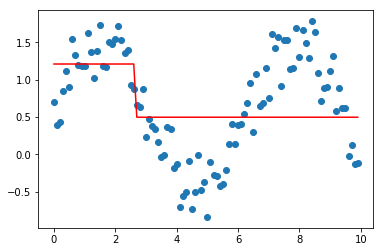

In [11]:
plt.scatter(x,y)
plt.plot(x,y1_pred,color='red')

## Residual plot

A pattern exists yet.

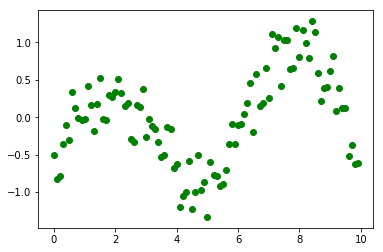

In [12]:
plt.scatter(x.reshape(-1,),r1.reshape(-1,), color='green')

## Construct second tree on the residual

In [13]:
DT2 = DecisionTreeRegressor(max_depth=1)
DT2.fit(x,r1)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
y2_pred = DT2.predict(x)
r2 = r1 - y2_pred

## Second predicted values and residuals of first stage

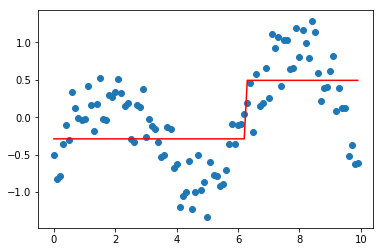

In [15]:
plt.scatter(x,r1)
plt.plot(x,y2_pred,color='red')

## Predicted values of boosting when $H=2$

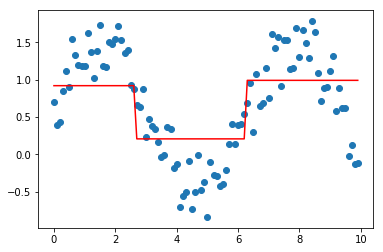

In [16]:
plt.scatter(x,y)
plt.plot(x,y1_pred+y2_pred,color='red')

## Likewise, let's make a simple boosting model using stump!

- This is the forward stagewise additive modeling.
- I skiped the weight paramters averaging weak models for simplicity.

In [17]:
def Boosting_stump(x, y, H):
    DT_dict = {}
    y_pred_dict = {}
    for iters in range(H):
        stump = DecisionTreeRegressor(max_depth=1)
        stump.fit(x,y)
        y_pred = stump.predict(x)
        y_pred_dict[iters] = y_pred
        residual = y-y_pred
        y = residual
        DT_dict[iters] = stump
    return y_pred_dict

In [18]:
temp_y = y.copy()

In [19]:
y_pred_dict = Boosting_stump(x, temp_y, 1000)

- visualization

In [20]:
def sum_of_pred(y_pred_dict, iters):
    sum_of_pred = np.zeros(len(y_pred_dict[0]))
    for num in range(iters):
        sum_of_pred = sum_of_pred + y_pred_dict[num]
    return(sum_of_pred)

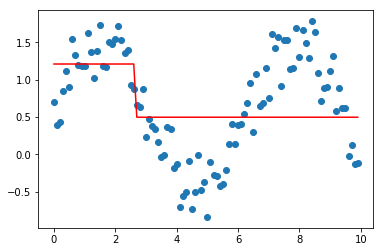

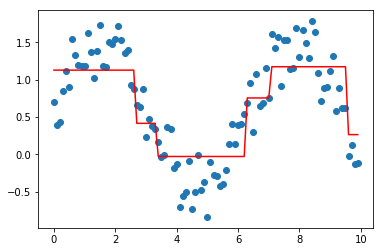

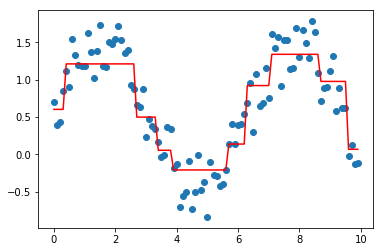

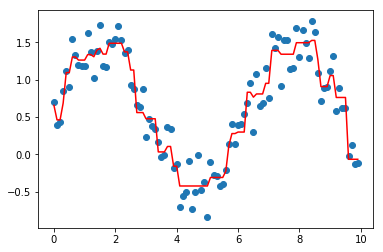

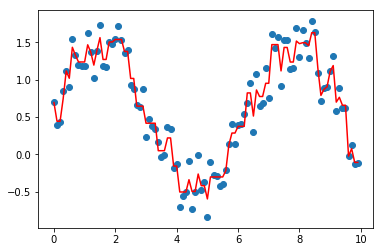

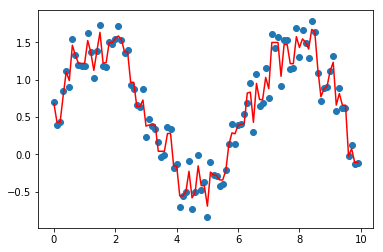

In [21]:
for show in [1,5,10,100,500,999]:
    plt.scatter(x,y)
    plt.plot(x,sum_of_pred(y_pred_dict, show),color='red')
    plt.show()

- This is a major concept of Boosting!
- You can recognize that a boosting model is easy to have **overfitting!**
- The number of trees, $H$, is an important tunining parameter.

### Practice
- Construct a simple boosting model using simple linear regression.
- And, report differences when the stump is used instead.

# AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
?GradientBoostingRegressor

# XGBoost

In [28]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/4f/4c/4969b10939c4557ae46e5569d07c0c7ce772b3d6b9c1401a6ed07059fdee/xgboost-0.81.tar.gz
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/y1/1sd072rd2h159qz2xrp00mnh0000gp/T/pip-build-cav9441m/xgboost
    + cd ./xgboost/
    + echo darwin17
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which clang++
    /usr/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    Makefile:31: MAKE [/Applications/Xcode.app/Contents/Developer/usr/bin/make] - checked OK
    rm -f -rf build build_plugin lib bin *~ */*~ */*/*~ */*/*/*~ */*.o */*/*.o */*/*/*.o #xgboost
    rm -f -rf build_tests *.gcov tests/cpp/xgboost_test
    if [ -d "R-package/src" ]; then \
    		cd R-package/src; \
    		rm -f -rf rabit src include dmlc-core amalgamation *.so *.dll; \
    		cd /private/var/folders/y1/1sd07

Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/y1/1sd072rd2h159qz2xrp00mnh0000gp/T/pip-build-cav9441m/xgboost/
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

- generating train data

In [ ]:
np.random.seed(123)
# x : 0 ~ 10 
x = np.array([x*0.01 for x in range(0,1000)]).reshape(-1,1)
y = np.array(list(map(lambda x:f(x,1), x))).reshape(-1)

- generating test data

In [ ]:
np.random.seed(321)
# x : 0 ~ 10 
test_x = np.array([x*0.1 for x in range(0,100)]).reshape(-1,1)
test_y = np.array(list(map(lambda x:f(x,1), test_x))).reshape(-1)

- Declare a XGB_regressor instance

In [ ]:
xgb_reg = xgb.XGBRegressor()

In [ ]:
params_dict = {'max_depth':[3,5,7,9],'n_estimators':[10,50,100], 'subsample':[0.1,0.5,1]}

In [ ]:
xgb_gdv = GridSearchCV(xgb_reg, param_grid=params_dict, cv=5)

In [ ]:
%%time
xgb_gdv.fit(x,y)

In [ ]:
xgb_gdv.best_params_

In [ ]:
# Call predict on the estimator with the best found parameters.
pred_y = xgb_gdv.predict(test_x)

In [ ]:
plt.scatter(x,y)
plt.plot(test_x,pred_y, color='yellow')

- Customizing loss function : 
please, refer to https://github.com/tqchen/xgboost/blob/master/demo/guide-python/custom_objective.py

- For example, $K$-categories classification problem

$$L\left(\{y_{k},F_{k}(x)\}_{k=1}^{K}\right)=-\sum_{k=1}^{K}y_{k}\log p_{k}(x)$$

where 

$$p_{k}(x)=\dfrac{\exp(F_{k}(x))}{\sum_{l}\exp(F_{l}(x))}.$$

This setting has following the first and second derivatives,

$$\dfrac{dL}{dF_{k}}=-y_{k}+p_{k}(x)\sum y_{k}=-y_{k}+p_{k}$$


$$\dfrac{d^{2}L}{dF_{k}^{2}}=\dfrac{\exp\left(F_{k}(x)\right)\left(\sum_{l}\exp\left(F_{l}(x)\right)\right)-\exp\left(2F_{k}(x)\right)}{\left(\sum_{l}\exp\left(F_{l}(x)\right)\right)^{2}}=p_{k}(x)\left(1-p_{k}(x)\right).$$

In [ ]:
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    probs = 1.0 / (1.0 + np.exp(-preds))
    grad = probs - labels
    hess = probs * (1.0 - probs)
    return grad, hess

- evaluation metric

In [ ]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

- Do you have an idea to assign more weights on minority class?

# LightGBM

In [29]:
!pip install lightgbm

    100% |████████████████████████████████| 645kB 527kB/s ta 0:00:01
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [30]:
import lightgbm as lgb

OSError: dlopen(/anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /anaconda3/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

- train set

In [ ]:
np.random.seed(123)
# x : 0 ~ 10 
x = np.array([x*0.0001 for x in range(0,100000)]).reshape(-1,1)
y = np.array(list(map(lambda x:f(x,2), x))).reshape(-1)

- validation set

In [ ]:
np.random.seed(321)
# x : 0 ~ 10 
test_x = np.array([x*0.1 for x in range(0,100)]).reshape(-1,1)
test_y = np.array(list(map(lambda x:f(x,1), test_x))).reshape(-1)

In [ ]:
lgb_train_data = lgb.Dataset(x,y)
lgb_validation_data = lgb.Dataset(test_x, test_y, reference=lgb_train_data)

In [ ]:
params_dict = {'max_depth':2,
               'reg_lambda':0.5, 
               'objective':'regression',
               'metric':'mse', 
               'learning_rate':0.01}

## early stopping

- Boosting models are easy to be overfitted.
- By looking for the first time to make the model overfitted, we can avoid overfitting.
- This is early stopping.

In [ ]:
eval_results = {}
lgb_model = lgb.train(params_dict, 
                      num_boost_round=1000, 
                      train_set=lgb_train_data, 
                      valid_sets=lgb_validation_data, 
                      early_stopping_rounds=100, 
                      evals_result=eval_results)

In [ ]:
lgb.plot_metric(eval_results)

In [ ]:
lgb.plot_importance(lgb_model)

In [ ]:
lgb.plot_tree(lgb_model,figsize=(10,5))

In [ ]:
params = {
        'learning_rate':0.01,
        'n_estimators':1000
         }

In [ ]:
lgb_reg = lgb.LGBMRegressor(**params)

In [ ]:
lgb_reg.fit(x,y,eval_set=(test_x, test_y), eval_metric='mae', early_stopping_rounds=100)

- For more details, please refer to 
https://www.avanwyk.com/an-overview-of-lightgbm/

# CatBoost

In [ ]:
import catboost as cat

- You can also use CatBoost model, such as XGBoost, lightGBM. It is your jobs to search how to use these models elaborately.

# Partial Dependence Plot

In [ ]:
from sklearn.datasets import make_friedman1
import pandas as pd
#from sklearn.ensemble.partial_dependence import  plot_partial_dependence # This supports only GB model.

In [ ]:
X, y = make_friedman1()

- change above numpy array into pandas format.

In [ ]:
X = pd.DataFrame(X)
X.columns = ['X'+str(i+1) for i in range(10)]
y = pd.Series(y,name='reponse')
data = X.assign(response=y)

- Finding Hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_dict = {'max_depth':[1,3,5,7],'learning_rate':[0.01,0.1,1.0],'n_estimator':[10,100,300]}
reg = xgb.XGBRegressor()

In [ ]:
grid = GridSearchCV(reg,param_grid=params_dict)

In [ ]:
grid.fit(X=data[[x for x in data.columns if x not in 'response']], y=data['response'])

In [ ]:
grid.best_params_

- Fitting the final model.

In [ ]:
reg = xgb.XGBRegressor(**grid.best_params_)
reg.fit(data[[x for x in data.columns if x not in ['response']]],data['response'])

- Drawing PDP plots


https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_regression.ipynb

In [ ]:
from pdpbox import pdp

In [ ]:
interest = 'X10'

In [ ]:
pdp_get_in = pdp.pdp_isolate(
    model = reg, dataset=data, model_features=[x for x in data.columns if x not in ['response']], feature=interest
)
fig, axes = pdp.pdp_plot(pdp_get_in, interest, plot_lines=True, frac_to_plot=100)

In [ ]:
interest=['X1', 'X5']

In [ ]:
pdp_get_in = pdp.pdp_interact(
    model=reg, dataset=data, model_features=[x for x in data.columns if x not in ['response']], features=interest)
fig, axes = pdp.pdp_interact_plot(
    pdp_get_in, interest, x_quantile=True, plot_type='contour', plot_pdp=False
)